# Weight of Evidence 

**Definition**  
Weight of Evidence (WoE) is a method of converting categorical variables (or binned continuous variables) into continuous values that represent the importance (or weight of evidence) of the variables in predicting the target variable. This can be used for binary classification.   

The WoE is coming from the credit and financial industry to calculate a measure of 'how good' a customer group is when it comes to paying back a loan (i.e. evaluating the risk of loan default).  


$$ WoE = \ln \frac{\text{Proportion of good events}}{\text{Proportion of bad events}}$$

where, 
* Proportion of good events: count of good events per category/ total good events
* Proportion of bad events: count of bad events per category/ total bad events

**How to calculate**  
1. Calculate the count of good events and bad events in each category, as well as the total number of good events and bad events.
2. Calculate the proprtion (relative frequency) of good events per each category compared to the total good events. Do the same thing for bad events. 
3. Calculate the log of the proportion of good events divided by the proportion of bad events. 


![woe_example](images/weight_of_evidence_example.png)

< Example of WoE calculation > [image source](https://aquicore.udemy.com/course/feature-engineering-for-machine-learning)


**Interpretation**
- The second step, calculating the proportion of good events and bad events per each category, is to compensate the imbalanced observations of good events and bad events. For example, if there are more good events than bad events, simply comparing the count of good events and bad events within a category won't tell us how good the category is when it comes to predicting the target event.
- The third step would tell us how different the frequencies of good events and bad events are in a category, which means how important this category is when predicting the target variable. 
    - If P(Good) > P(Bad), then the WoE will be > 0. This means the category is more likely to have good events. 
    - If P(Bad) > P(Good), then the WoE will be < 0. This means the category is more likely to have bad events.
    - If P(Good) = P(Bad), then the WoEwill be 0. This means the category has random outcome. 


**Advantages** 
- It sets a monotonic relationship between the independent variable the target variable. This comes handy when finding the correlation between the indepdent variable and the target variable. Also, monotonic data helps avoid overfitting when training a model. 
- It is well suited for logistic regression as it orders the categories on a logistic scale which is natural for logistic regression.

**Limitations**
- It may lead to over-fitting 
- Loss of information when binning data into few categories or when different categories have the same WoE. 


**Further reading** 
- [Replacing Variables by WoE (Weight of Evidence) in Logistic Regression in StackExchange](https://stats.stackexchange.com/questions/189568/replacing-variables-by-woe-weight-of-evidence-in-logistic-regression)
- [Logistic Regression CMU Stat](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)
- [Information Value (IV) and Weight of Evidence (WOE) – A Case Study from Banking (Part 4)](http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/)
- [Why should one do a WOE transformation of categorical predictors in logistic regression?](https://stats.stackexchange.com/questions/166816/why-should-one-do-a-woe-transformation-of-categorical-predictors-in-logistic-reg)


In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split

# Read data

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Preprocessing 

## Check labels in categorical variables

In [4]:
for variable in ['sex', 'sibsp', 'parch', 'cabin', 'embarked']:
    print(f"Unique categories in variable {variable}:")
    print(df[variable].unique())
    print()

Unique categories in variable sex:
['female' 'male']

Unique categories in variable sibsp:
[0 1 2 3 4 5 8]

Unique categories in variable parch:
[0 2 1 4 3 5 6 9]

Unique categories in variable cabin:
['B5' 'C22' 'E12' 'D7' 'A36' 'C101' nan 'C62' 'B35' 'A23' 'B58' 'D15' 'C6'
 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7' 'C103' 'D22' 'E33'
 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51' 'B96' 'C46' 'E31' 'E8' 'B61'
 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52' 'E45' 'B22' 'B26' 'C85' 'E17'
 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18' 'C54' 'C45' 'D20' 'A29' 'C95'
 'E25' 'C111' 'C23' 'E36' 'D34' 'D40' 'B39' 'B41' 'B102' 'C123' 'E63'
 'C130' 'B86' 'C92' 'A5' 'C51' 'B42' 'C91' 'C125' 'D10' 'B82' 'E50' 'D33'
 'C83' 'B94' 'D49' 'D45' 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28'
 'C49' 'B52' 'E60' 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6'
 'D9' 'B80' 'C106' 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36'
 'D48' 'D47' 'C105' 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C

## Extract the first letter of cabin 

In [5]:
df['cabin'] = df['cabin'].astype(str).str[0] # astype(str) will convert NaN to 'nan'

In [6]:
df['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'T', 'F', 'G'], dtype=object)

## Convert nan to 'n' in embarked

In [7]:
df['embarked'] = df['embarked'].astype(str).str[0] # astype(str) will convert NaN to 'nan'

In [8]:
df['embarked'].unique()

array(['S', 'C', 'n', 'Q'], dtype=object)

## Check the number of data points

In [9]:
for variable in ['sex', 'sibsp', 'parch', 'cabin', 'embarked']:
    cabin_count = df.groupby(variable)['survived'].count()
    cabin_percent = round(df.groupby(variable)['survived'].count()/len(df) * 100)

    display(pd.concat([cabin_count, cabin_percent], keys=['count', 'percent (%)'],  axis=1))

,count,percent (%)
sex,,
female,466,36.0
male,843,64.0


,count,percent (%)
sibsp,,
0,891,68.0
1,319,24.0
2,42,3.0
3,20,2.0
4,22,2.0
5,6,0.0
8,9,1.0


,count,percent (%)
parch,,
0,1002,77.0
1,170,13.0
2,113,9.0
3,8,1.0
4,6,0.0
5,6,0.0
6,2,0.0
9,2,0.0


,count,percent (%)
cabin,,
A,22,2.0
B,65,5.0
C,94,7.0
D,46,4.0
E,41,3.0
F,21,2.0
G,5,0.0
T,1,0.0
n,1014,77.0


,count,percent (%)
embarked,,
C,270,21.0
Q,123,9.0
S,914,70.0
n,2,0.0


## Remove small categories

Let's remove all small categories that have less than 5 data points.

In [10]:
df = df[(df['sibsp'] < 5) & (df['parch'] < 6) & (df['cabin'] != 'T') & (df['embarked'] != 'n')]

In [11]:
for variable in ['sex', 'sibsp', 'parch', 'cabin', 'embarked']:
    cabin_count = df.groupby(variable)['survived'].count()
    cabin_percent = round(df.groupby(variable)['survived'].count()/len(df) * 100)

    display(pd.concat([cabin_count, cabin_percent], keys=['count', 'percent (%)'],  axis=1))

,count,percent (%)
sex,,
female,456,35.0
male,831,65.0


,count,percent (%)
sibsp,,
0,888,69.0
1,315,24.0
2,42,3.0
3,20,2.0
4,22,2.0


,count,percent (%)
parch,,
0,999,78.0
1,170,13.0
2,98,8.0
3,8,1.0
4,6,0.0
5,6,0.0


,count,percent (%)
cabin,,
A,22,2.0
B,63,5.0
C,94,7.0
D,46,4.0
E,41,3.0
F,21,2.0
G,5,0.0
n,995,77.0


,count,percent (%)
embarked,,
C,270,21.0
Q,123,10.0
S,894,69.0


## Check the distribution

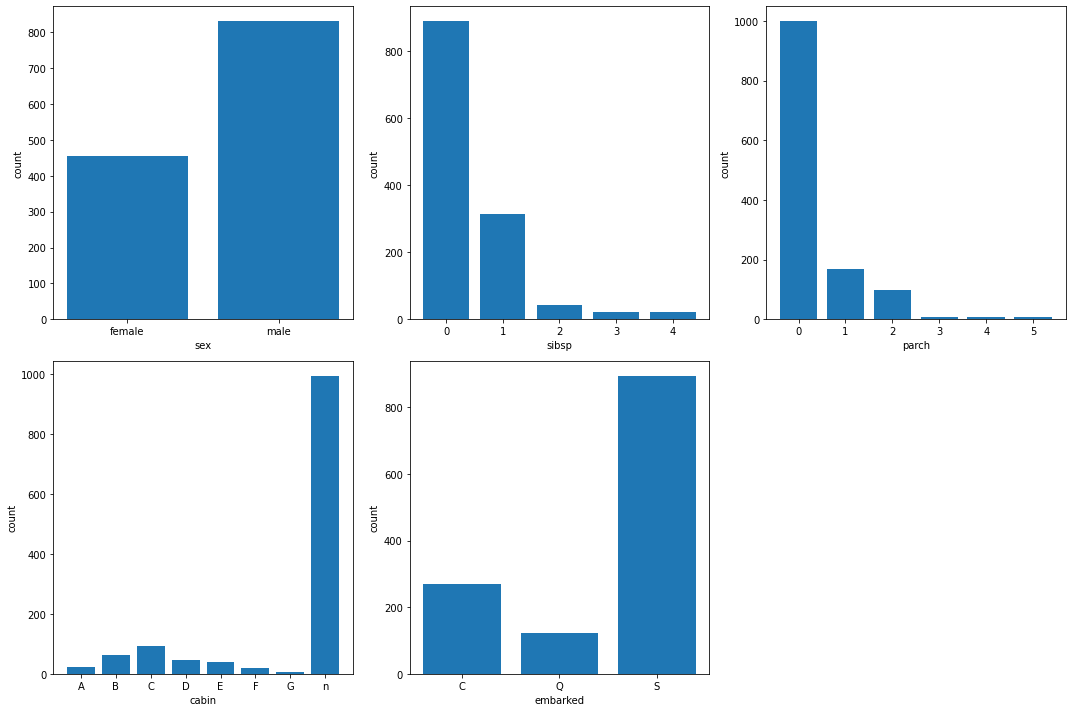

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
for i, variable in enumerate(['sex', 'sibsp', 'parch', 'cabin', 'embarked']):
    plt.subplot(2, 3, i+1)
    plt.bar(df.groupby(variable)['survived'].count().index, df.groupby(variable)['survived'].count())
    plt.xlabel(variable)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

# Split Data into Train and Test

In [13]:
variables = ['sex', 'sibsp', 'parch', 'cabin', 'embarked']
x_train_variables = variables + ['survived']  # we keep the target 
X_train, X_test, y_train, y_test = train_test_split(df[x_train_variables],  
                                                    df['survived'],
                                                   test_size=0.3, 
                                                   random_state=0)

# Original relationship between cateogorical variables and the probability of survivng 

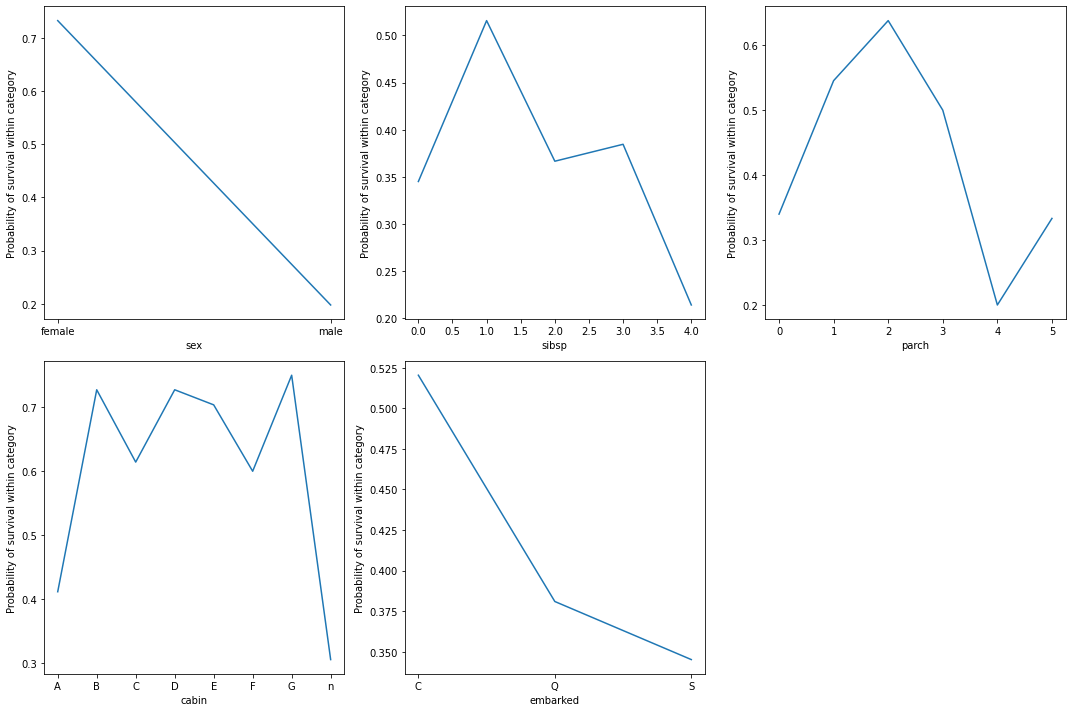

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    plt.plot(X_train.groupby([var])['survived'].mean())

    plt.xlabel(var)
    plt.ylabel('Probability of survival within category')
    
plt.tight_layout()
plt.show()

# Apply WOE to cabin category

## Add non_survived column

In [15]:
# add non_survived column for easier calculation in the next steps 
X_train['non_survived'] = np.where(X_train['survived']==1, 0, 1)

X_train

,sex,sibsp,parch,cabin,embarked,survived,non_survived
898,male,0,0,n,S,0,1
184,male,0,0,n,C,0,1
402,female,1,0,n,C,1,0
908,female,1,0,n,S,0,1
1267,female,1,1,n,S,0,1
...,...,...,...,...,...,...,...
766,male,0,0,n,S,0,1
846,male,0,0,n,S,0,1
1238,male,0,0,n,S,1,0
562,female,0,0,n,Q,1,0


## Calculate total survived and non-survived counts

In [16]:
total_survived = X_train['survived'].sum()
total_non_survived = X_train['non_survived'].sum()

print(f"Total survived: {total_survived}")
print(f"Total non-survived: {total_non_survived}")

Total survived: 348
Total non-survived: 552


## Calculate the ratio of survived and non-survived in each category

In [17]:
survived_df = X_train[X_train['survived']==1].groupby(['cabin'])['survived'].count()/total_survived
non_survived_df = X_train[X_train['non_survived']==1].groupby(['cabin'])['non_survived'].count()/total_non_survived

In [18]:
survived_df

cabin
A    0.020115
B    0.091954
C    0.123563
D    0.068966
E    0.054598
F    0.025862
G    0.008621
n    0.606322
Name: survived, dtype: float64

In [19]:
non_survived_df

cabin
A    0.018116
B    0.021739
C    0.048913
D    0.016304
E    0.014493
F    0.010870
G    0.001812
n    0.867754
Name: non_survived, dtype: float64

In [20]:
# put the data into one DataFrame 
prob_df = pd.concat([survived_df, non_survived_df], axis=1)
prob_df

,survived,non_survived
cabin,,
A,0.020115,0.018116
B,0.091954,0.021739
C,0.123563,0.048913
D,0.068966,0.016304
E,0.054598,0.014493
F,0.025862,0.010870
G,0.008621,0.001812
n,0.606322,0.867754


## Calculate WOE

In [21]:
prob_df['woe'] = np.log(prob_df['survived']/prob_df['non_survived'])

In [22]:
prob_df

,survived,non_survived,woe
cabin,,,
A,0.020115,0.018116,0.104671
B,0.091954,0.021739,1.442175
C,0.123563,0.048913,0.926709
D,0.068966,0.016304,1.442175
E,0.054598,0.014493,1.326343
F,0.025862,0.010870,0.866811
G,0.008621,0.001812,1.559958
n,0.606322,0.867754,-0.358497


In [23]:
# capture into a dictionary 

ordered_labels = prob_df['woe'].to_dict()
ordered_labels

{'A': 0.1046706225638886,
 'B': 1.4421748195143473,
 'C': 0.9267088161918544,
 'D': 1.4421748195143473,
 'E': 1.3263430039892254,
 'F': 0.8668106746107854,
 'G': 1.5599578551707307,
 'n': -0.3584968974322278}

In [24]:
# map labels and replace the original category column 

X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [25]:
# drop 'non_survived' column

X_train = X_train.drop('non_survived', axis=1)

In [26]:
X_train

,sex,sibsp,parch,cabin,embarked,survived
898,male,0,0,-0.358497,S,0
184,male,0,0,-0.358497,C,0
402,female,1,0,-0.358497,C,1
908,female,1,0,-0.358497,S,0
1267,female,1,1,-0.358497,S,0
...,...,...,...,...,...,...
766,male,0,0,-0.358497,S,0
846,male,0,0,-0.358497,S,0
1238,male,0,0,-0.358497,S,1
562,female,0,0,-0.358497,Q,1


In [27]:
X_test

,sex,sibsp,parch,cabin,embarked,survived
658,female,2,1,-0.358497,C,1
333,female,0,0,1.442175,S,1
1019,male,0,0,-0.358497,S,0
482,female,0,0,-0.358497,C,1
808,male,0,0,-0.358497,S,0
...,...,...,...,...,...,...
660,female,0,3,-0.358497,C,1
2,female,1,2,0.926709,S,0
756,male,1,0,-0.358497,S,0
341,female,2,1,0.866811,S,1


Text(0.5, 0, 'cabin')

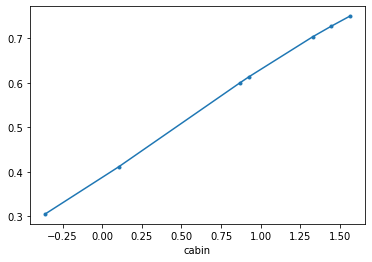

In [28]:
plt.plot(X_train.groupby(['cabin'])['survived'].mean(), '.-')
plt.xlabel('cabin')

# Apply WOE to all varriables with cleaned-up code

In [29]:
from typing import Dict, List

def get_woe_encoder(df: pd.DataFrame, variables: List, target: str) -> Dict: 
    mapper = {}
    
    df_copy = df.copy().reset_index(drop=True)
    
    for variable in variables:

        # add non_target column
        df_copy['non_target'] = np.where(df_copy[target]==1, 0, 1)

        # total number of positive and negative cases
        total_pos = df_copy.groupby(variable)[target].sum()
        total_neg = df_copy.groupby(variable)['non_target'].sum() 

        # get groupby ratio 
        ratio_pos = df_copy.groupby(variable)[target].count()/total_pos
        ratio_neg = df_copy.groupby(variable)['non_target'].count()/total_neg

        # woe
        woe = np.log(ratio_pos/ratio_neg)

        # dictionary 
        mapper[variable] = woe.to_dict()
        
    return mapper

In [30]:
# split data 

X_train, X_test, y_train, y_test = train_test_split(df[x_train_variables],  # we keep the target 
                                                    df['survived'],
                                                   test_size=0.3, 
                                                   random_state=0)

In [31]:

encoder = get_woe_encoder(X_train, variables, 'survived')

for variable in variables:
    X_train[variable] = X_train[variable].map(encoder[variable])
    X_test[variable] = X_test[variable].map(encoder[variable])

In [32]:
X_train

,sex,sibsp,parch,cabin,embarked,survived
898,1.401397,0.640377,0.663671,0.819842,0.640377,0
184,1.401397,0.640377,0.663671,0.819842,-0.081678,0
402,-1.008387,-0.062801,0.663671,0.819842,-0.081678,1
908,-1.008387,-0.062801,0.663671,0.819842,0.640377,0
1267,-1.008387,-0.062801,-0.182322,0.819842,0.640377,0
...,...,...,...,...,...,...
766,1.401397,0.640377,0.663671,0.819842,0.640377,0
846,1.401397,0.640377,0.663671,0.819842,0.640377,0
1238,1.401397,0.640377,0.663671,0.819842,0.640377,1
562,-1.008387,0.640377,0.663671,0.819842,0.485508,1


In [33]:
X_test

,sex,sibsp,parch,cabin,embarked,survived
658,-1.008387,0.546544,-0.182322,0.819842,-0.081678,1
333,-1.008387,0.640377,0.663671,-0.980829,0.640377,1
1019,1.401397,0.640377,0.663671,0.819842,0.640377,0
482,-1.008387,0.640377,0.663671,0.819842,-0.081678,1
808,1.401397,0.640377,0.663671,0.819842,0.640377,0
...,...,...,...,...,...,...
660,-1.008387,0.640377,0.000000,0.819842,-0.081678,1
2,-1.008387,-0.062801,-0.566395,-0.465363,0.640377,0
756,1.401397,-0.062801,0.663671,0.819842,0.640377,0
341,-1.008387,0.546544,-0.182322,-0.405465,0.640377,1


## Relationship between categorical variable and probability of surviving after WOE

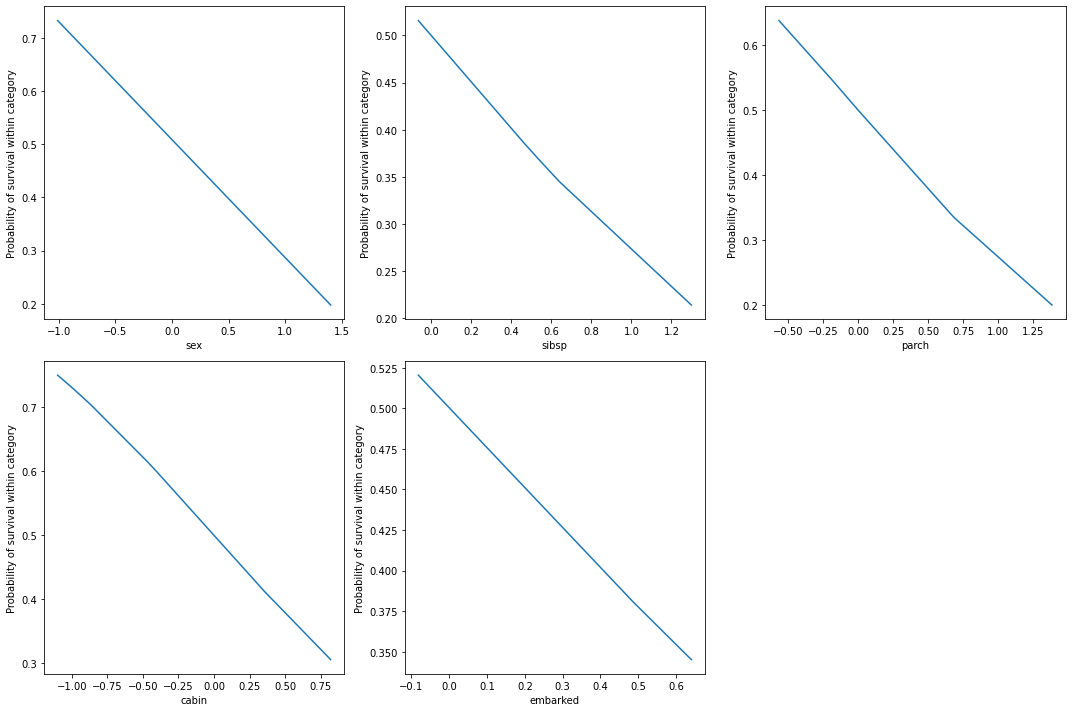

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    plt.plot(X_train.groupby([var])['survived'].mean())

    plt.xlabel(var)
    plt.ylabel('Probability of survival within category')
    
plt.tight_layout()
plt.show()

# Train and evaluate a model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [36]:
lr = LogisticRegression()
lr.fit(X_train[variables], y_train)

rf = RandomForestClassifier()
rf.fit(X_train[variables], y_train)


RandomForestClassifier()

In [37]:
def print_scores(clf, y_test):
    y_pred = clf.predict(X_test[variables])
    print(f"accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
    print(f"precision: {round(precision_score(y_test, y_pred), 2)}")
    print(f"recall: {round(recall_score(y_test, y_pred), 2)}")
    print(f"f1: {round(f1_score(y_test, y_pred), 2)}")
    print(f"roc-auc: {round(roc_auc_score(y_test, y_pred), 2)}")

In [38]:
print_scores(lr, y_test)

accuracy: 0.79
precision: 0.74
recall: 0.73
f1: 0.73
roc-auc: 0.78


In [39]:
print_scores(rf, y_test)

accuracy: 0.79
precision: 0.74
recall: 0.69
f1: 0.71
roc-auc: 0.77


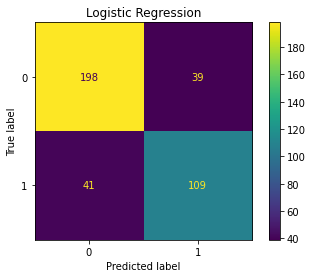

In [40]:
plot_confusion_matrix(lr, X_test[variables], y_test)
plt.title('Logistic Regression')
plt.show()

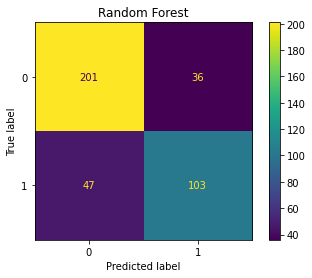

In [41]:
plot_confusion_matrix(rf, X_test[variables], y_test)
plt.title('Random Forest')
plt.show()